#Pertemuan 13: Data Visualization using Matplotlib and Seaborn

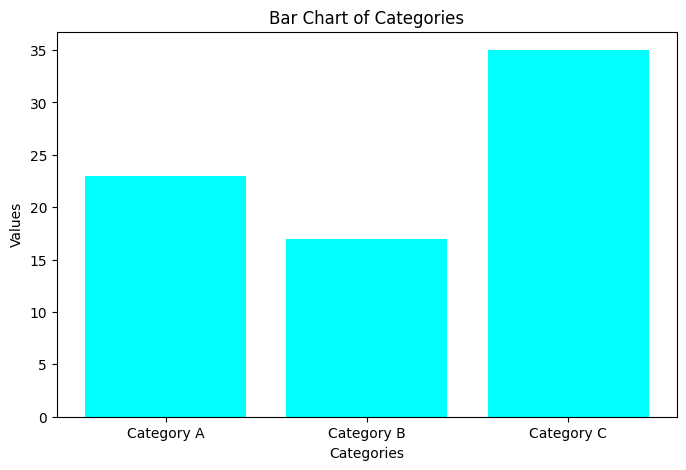

In [ ]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


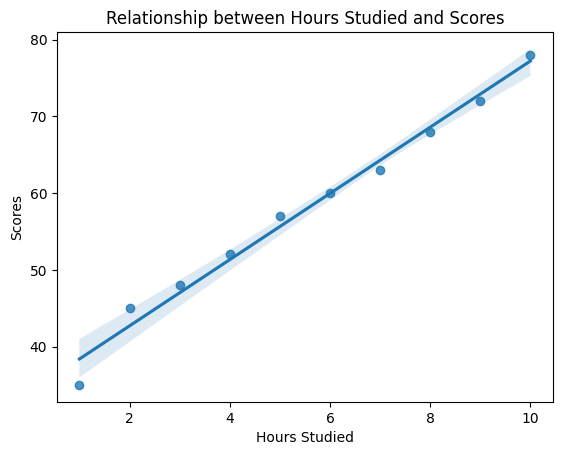

In [ ]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


## Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


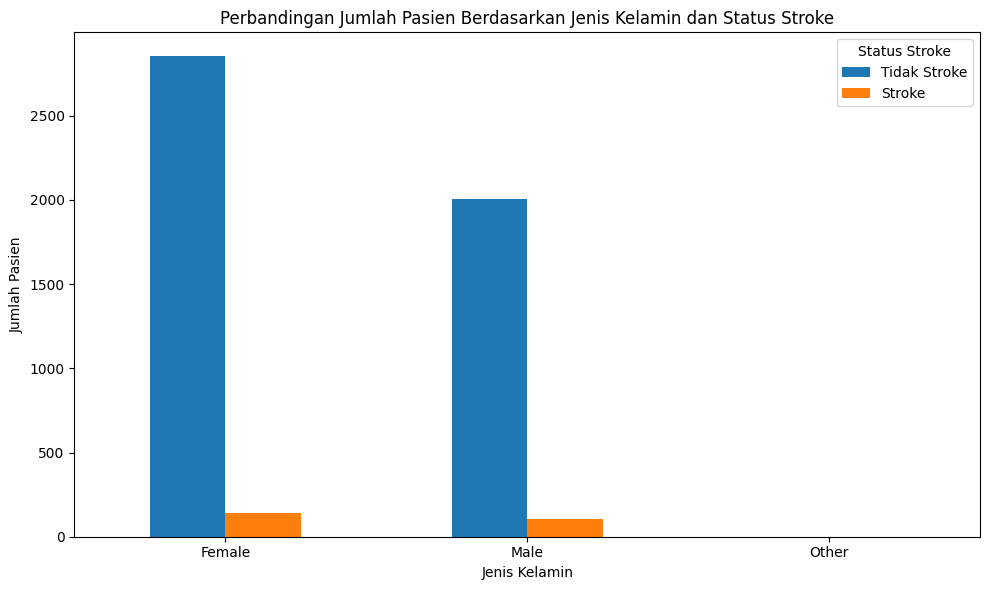

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset
df = pd.read_csv('stroke.csv')

# Menampilkan beberapa baris pertama untuk memahami struktur data
print(df.head())

# Menghitung jumlah pasien berdasarkan jenis kelamin dan status stroke
gender_stroke_counts = df.groupby(['gender', 'stroke']).size().unstack()

# Membuat diagram batang ganda
gender_stroke_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

# Menambahkan judul dan label
plt.title('Perbandingan Jumlah Pasien Berdasarkan Jenis Kelamin dan Status Stroke')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=0)
plt.legend(title='Status Stroke', labels=['Tidak Stroke', 'Stroke'])

# Menampilkan plot
plt.tight_layout()
plt.show()

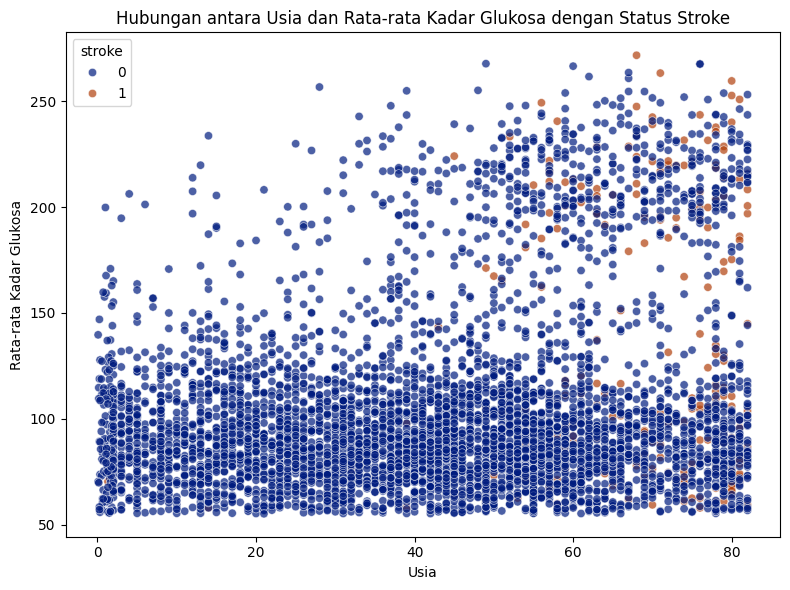

In [ ]:
import seaborn as sns

# Membuat plot sebar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', palette='dark', alpha=0.7)

# Menambahkan judul dan label
plt.title('Hubungan antara Usia dan Rata-rata Kadar Glukosa dengan Status Stroke')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Kadar Glukosa')

# Menampilkan plot
plt.tight_layout()
plt.show()

#HomeWork 13
- Pertemuan 13: Create a dashboard with multiple visualizations to summarize a dataset of your choice.

Data Before Cleaning :
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S   

Missing values before cleaning :
PassengerId      0
Survived 

<ipython-input-11-7b8e72fe303f>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-11-7b8e72fe303f>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

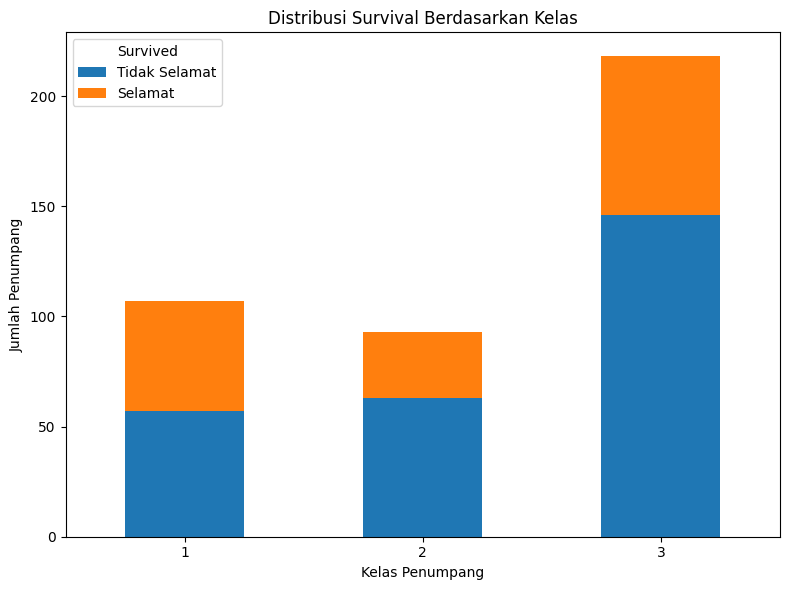

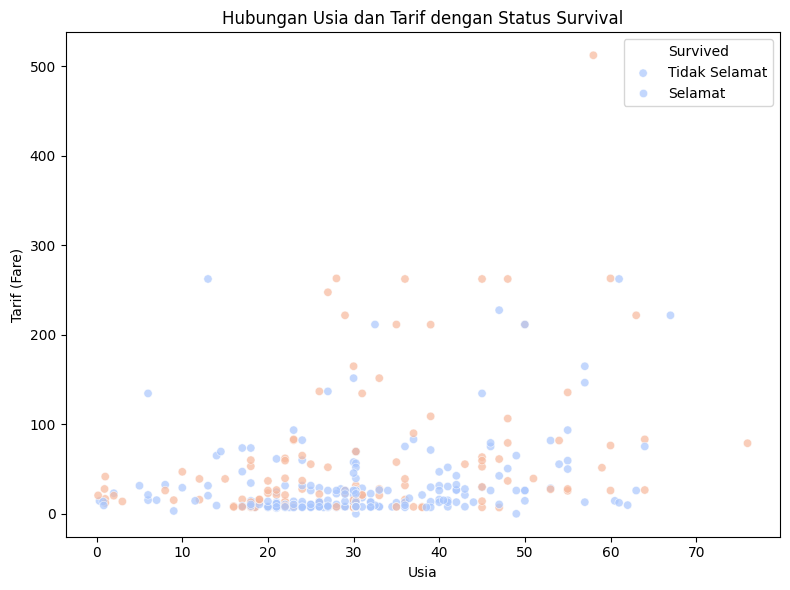

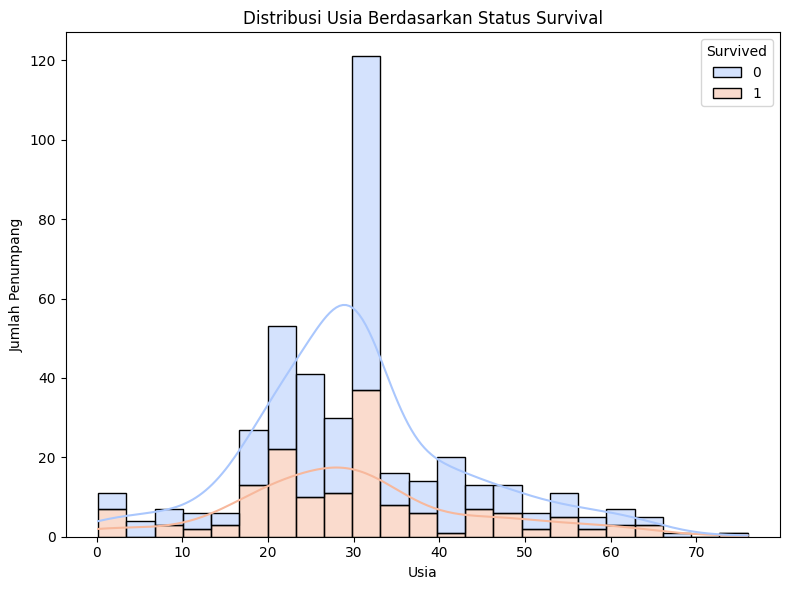

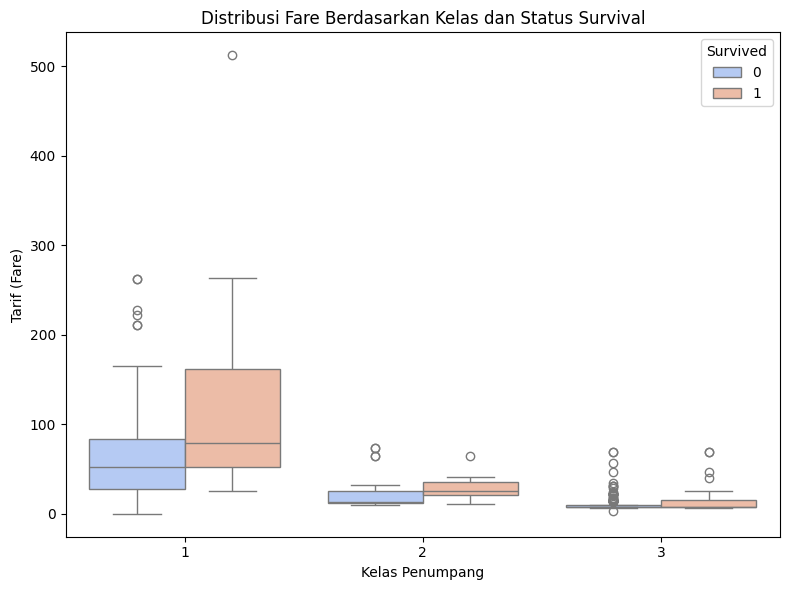

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Titanic dataset
df = pd.read_csv('Titanic.csv')

# Display the first few rows of the dataset
print('Data Before Cleaning :')
print(df.head(), '\n')

# Missing Values
print("Missing values before cleaning :")
print(df.isnull().sum())


# perbaikan data
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = df['Sex'].str.lower()
df.dropna(subset=['Name'], inplace=True)

# 6. Drop columns that are not useful for analysis (e.g., Ticket, Cabin, PassengerId)
df.drop(columns=['Ticket', 'Cabin', 'PassengerId'], inplace=True)

# Display the cleaned dataframe
print("\nCleaned DataFrame:")
print(df.head())

# 7. Check for any remaining missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum(),'\n')


# Distribusi survival berdasarkan kelas
survival_by_class = df.groupby(['Pclass', 'Survived']).size().unstack()

# Plot
survival_by_class.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Distribusi Survival Berdasarkan Kelas')
plt.xlabel('Kelas Penumpang')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.7)
plt.title('Hubungan Usia dan Tarif dengan Status Survival')
plt.xlabel('Usia')
plt.ylabel('Tarif (Fare)')
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True, palette='coolwarm')
plt.title('Distribusi Usia Berdasarkan Status Survival')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Distribusi Fare Berdasarkan Kelas dan Status Survival')
plt.xlabel('Kelas Penumpang')
plt.ylabel('Tarif (Fare)')
plt.tight_layout()
plt.show()


